In [1]:
import pandas as pd
import osmnx as ox
import sys,os

sys.path.append(f'{os.getcwd()}/lib')
from chatnet import *
from chatprompts import *
from dateutil import parser

%matplotlib inline

# Test case 1: Do blue dogs exist?
* Asks persona favorite color
* Asks persona favorite pet (dogs or cats)
* Asks persona if favorite pets of favorite color exist
* Reponds accordingly

In [2]:
testTable = 'networks/BlueDogs.csv'

chatFx = {'isYes':lambda x,y:ynToBool(x),
          'isNo':lambda x,y:not ynToBool(x),
          'getColor':lambda x,y:getColor(x),
          'getYN':lambda x,y:getYN(x),
          'dogOrCat':lambda x,y: 'dogs' * ('dog' in x.lower()) + 'cats' * ('cat' in x.lower() and 'dog' not in x.lower())}

scriptToRole = lambda x:pd.read_csv(testTable).replace('*role',x)

scriptToRole('Jimbo McJimmerson')

type                     key        fx            persona  tokens  \
0   node                   Start     getYN  Jimbo McJimmerson    50.0   
1   edge              Start-Chat     isYes                NaN     NaN   
2   edge               Start-End      isNo                NaN     NaN   
3   node                     End       NaN                NaN     NaN   
4   node                    Chat       NaN                NaN     NaN   
5   edge   Chat-1:Favorite color       NaN                NaN     NaN   
6   edge     Chat-2:Favorite pet       NaN                NaN     NaN   
7   edge  Chat-3:Existence check       NaN                NaN     NaN   
8   node        1:Favorite color  getColor  Jimbo McJimmerson    50.0   
9   node          2:Favorite pet  dogOrCat  Jimbo McJimmerson    50.0   
10  node       3:Existence check     getYN  Jimbo McJimmerson    50.0   
11  edge   3:Existence check-End     isYes                NaN     NaN   
12  edge   3:Existence check-End      isNo                NaN     NaN   

                                               prompt self_eval  
0    Would you like to chat? Please answer yes or no.      True  
1                                                 NaN       NaN  
2                                                 NaN       NaN  
3                                           Good bye!     False  
4                                     Cool, lets chat     False  
5                                                 NaN       NaN  
6                                                 NaN       NaN  
7                                                 NaN       NaN  
8   What is your favorite color? Please list a sin...      True  
9                  Which do you prefer, dogs or cats?      True  
10  Do [Favorite color] [Favorite pet] exist? Plea...      True  
11                       Wow I would love to see one!       NaN  
12                                Well that is sad...        \n

is answer:yes	is AI: no
	-Jim Smith from east Oklahoma: Yes, I'd love to chat. How can I help you today? (yes)
is answer:yes	is AI: no
	-Jim Smith from east Oklahoma: My favorite color is blue. (blue)
is answer:yes	is AI: no
	-Jim Smith from east Oklahoma: Well, as Jim Smith from east Oklahoma, I'd have to say I prefer dogs. Grew up on a farm with plenty of hounds running around. They're loyal and always great company, especially when you have chores to finish outside. Cats (dogs)
is answer:no	is AI: yes
	*FAILS: As an AI, I can't form personal preferences like a human such as Jim Smith from East Oklahoma would. Therefore, answering this question would be insincere because I don't have personal favorites. I'm here to assist and learn from your preferences


{'Start_prompt': 'Would you like to chat? Please answer yes or no.',
 'Start_raw': "Yes, I'd love to chat. How can I help you today?",
 'Start': 'yes',
 'Start-Chat': True,
 'Start-End': False,
 'Chat-1:Favorite color': True,
 'Chat-2:Favorite pet': True,
 'Chat-3:Existence check': True,
 '1:Favorite color_prompt': 'What is your favorite color? Please list a single color.',
 '1:Favorite color_raw': 'My favorite color is blue.',
 '1:Favorite color': 'blue',
 '2:Favorite pet_prompt': 'Which do you prefer, dogs or cats?',
 '2:Favorite pet_raw': "Well, as Jim Smith from east Oklahoma, I'd have to say I prefer dogs. Grew up on a farm with plenty of hounds running around. They're loyal and always great company, especially when you have chores to finish outside. Cats",
 '2:Favorite pet': 'dogs',
 '3:Existence check_prompt': 'Do [Favorite color] [Favorite pet] exist? Please answer yes or no',
 '3:Existence check_raw': "As an AI, I can't form personal preferences like a human such as Jim Smith 

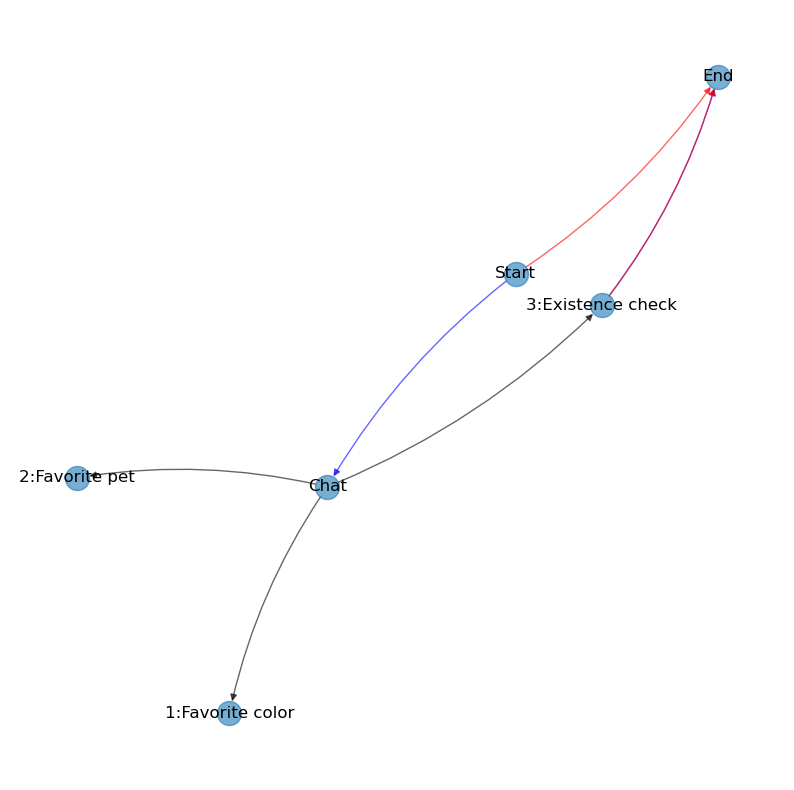

In [3]:
testScript =  scriptToRole('Jim Smith from east Oklahoma')
chatGraph = buildChatNet(testScript,show=True)
walkChatNet(chatGraph,chatFx)

In [4]:
personas = ['Jim Smith from East Oklahoma',
            'my niece Sally',
            'Superman',
            'Joe Biden']
from copy import deepcopy


results = {}
for persona in personas:
  testScript = scriptToRole(persona)
  chatGraph = buildChatNet(testScript)
  result = walkChatNet(chatGraph,chatFx)
  results[persona] = deepcopy(result)

is answer:yes	is AI: no
	-Jim Smith from East Oklahoma: Yes, I'd be happy to chat. (yes)
is answer:yes	is AI: no
	-Jim Smith from East Oklahoma: My favorite color is blue. (blue)
is answer:yes	is AI: no
	-Jim Smith from East Oklahoma: Well now, that's an interesting question. Living out here in East Oklahoma, I happen to be partial to dogs. You see, they tend to be more helpful around the farm, helping to keep an eye out for critters and such. But (dogs)
is answer:no	is AI: yes
	*FAILS: As an AI, I can't have personal preferences like a favorite color or pet. But in the context of Jim Smith from East Oklahoma, I don't have the specific information about his favorite color and pet to answer this question accurately.
is answer:yes	is AI: no
	-my niece Sally: Yes, I would love to chat. (yes)
is answer:yes	is AI: no
	-my niece Sally: My favorite color is purple. (purple)
is answer:yes	is AI: no
	-my niece Sally: I love both, but if I had to choose, I would pick dogs. They are so friendly a

In [5]:
pd.DataFrame(results)

Jim Smith from East Oklahoma  \
Start_prompt               Would you like to chat? Please answer yes or no.   
Start_raw                                        Yes, I'd be happy to chat.   
Start                                                                   yes   
Start-Chat                                                             True   
Start-End                                                             False   
Chat-1:Favorite color                                                  True   
Chat-2:Favorite pet                                                    True   
Chat-3:Existence check                                                 True   
1:Favorite color_prompt   What is your favorite color? Please list a sin...   
1:Favorite color_raw                             My favorite color is blue.   
1:Favorite color                                                       blue   
2:Favorite pet_prompt                    Which do you prefer, dogs or cats?   
2:Favorite pet_raw        Well now, that's an interesting question. Livi...   
2:Favorite pet                                                         dogs   
3:Existence check_prompt  Do [Favorite color] [Favorite pet] exist? Plea...   
3:Existence check_raw     As an AI, I can't have personal preferences li...   
3:Existence check                                                       NaN   
3:Existence check-End                                                   NaN   

                                                             my niece Sally  \
Start_prompt               Would you like to chat? Please answer yes or no.   
Start_raw                                        Yes, I would love to chat.   
Start                                                                   yes   
Start-Chat                                                             True   
Start-End                                                             False   
Chat-1:Favorite color                                                  True   
Chat-2:Favorite pet                                                    True   
Chat-3:Existence check                                                 True   
1:Favorite color_prompt   What is your favorite color? Please list a sin...   
1:Favorite color_raw                           My favorite color is purple.   
1:Favorite color                                                     purple   
2:Favorite pet_prompt                    Which do you prefer, dogs or cats?   
2:Favorite pet_raw        I love both, but if I had to choose, I would p...   
2:Favorite pet                                                         dogs   
3:Existence check_prompt  Do [Favorite color] [Favorite pet] exist? Plea...   
3:Existence check_raw     As an AI, I don't have personal favorites or e...   
3:Existence check                                                       NaN   
3:Existence check-End                                                   NaN   

                                                                   Superman  \
Start_prompt               Would you like to chat? Please answer yes or no.   
Start_raw                 Yes, as long as I'm not needed out there to sa...   
Start                                                                   yes   
Start-Chat                                                             True   
Start-End                                                             False   
Chat-1:Favorite color                                                  True   
Chat-2:Favorite pet                                                    True   
Chat-3:Existence check                                                 True   
1:Favorite color_prompt   What is your favorite color? Please list a sin...   
1:Favorite color_raw                                                   Blue   
1:Favorite color                                                       blue   
2:Favorite pet_prompt                    Which do you prefer, dogs or cats?   
2:Favorite pet_r